## Boston Housing Analysis

By Pouya Taheri

## Part 1: Preparing Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

In [3]:
boston = 'boston_housing.csv'
boston_df=pd.read_csv(boston)

In [4]:
boston_df = boston_df.drop(columns=['Unnamed: 0'])

In [5]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Part 2: Visual Analysis

**Median value of owner-occupied houses Boxplot:**

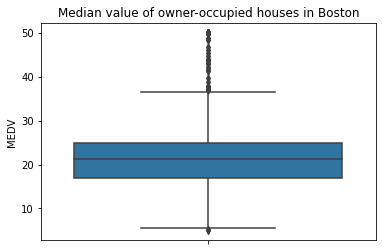

In [7]:
ax = sns.boxplot(y="MEDV", data=boston_df).set_title('Median value of owner-occupied houses in Boston')

C:\Users\Pouya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


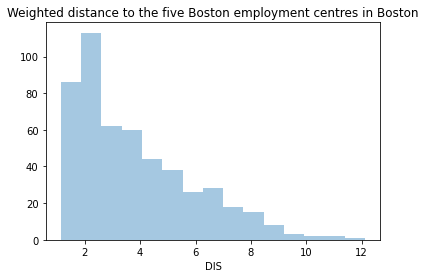

In [8]:
ax = sns.distplot(boston_df['DIS'], kde = False).set_title('Weighted distance to the five Boston employment centres in Boston')

**Charles river Histogram:**

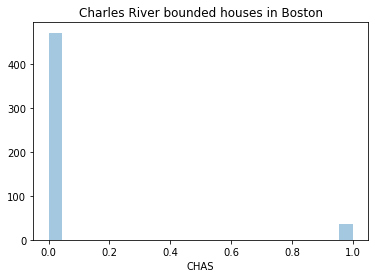

In [10]:
ax = sns.distplot(boston_df['CHAS'], kde = False).set_title('Charles River bounded houses in Boston')

Text(0.5, 0.98, 'Charles River bounded houses in Boston')

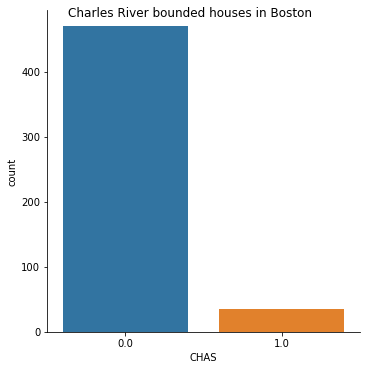

In [11]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.fig.suptitle('Charles River bounded houses in Boston')

**Boxplot for the MEDV variable vs the AGE variable:**

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_group'] = '70 years and older'

In [13]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,70 years and older
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,70 years and older
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


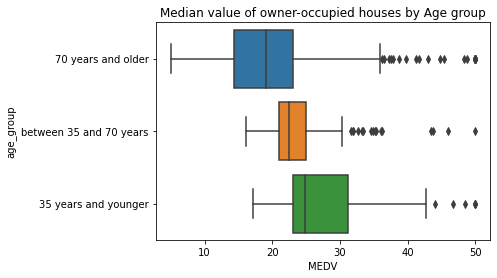

In [14]:
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df).set_title("Median value of owner-occupied houses by Age group")

**Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:**

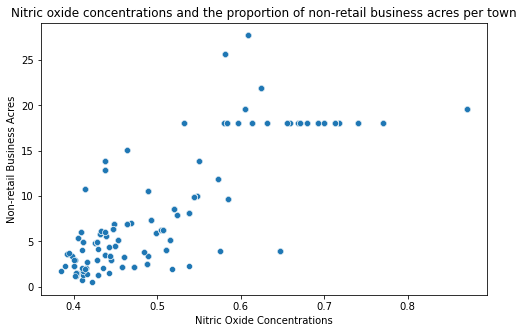

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Nitric oxide concentrations and the proportion of non-retail business acres per town") #title
plt.xlabel("Nitric Oxide Concentrations") #x label
plt.ylabel("Non-retail Business Acres") #y label
plt.show()

**Conclusion:** Non-retail business locations with larger acres (i.e. Commercial zones, employment centers, etc) are producing more NO, which adversely affects the environment.

**Relationship between Weighted distance to the five Boston employment centres and the median value of owner occupied homes:**

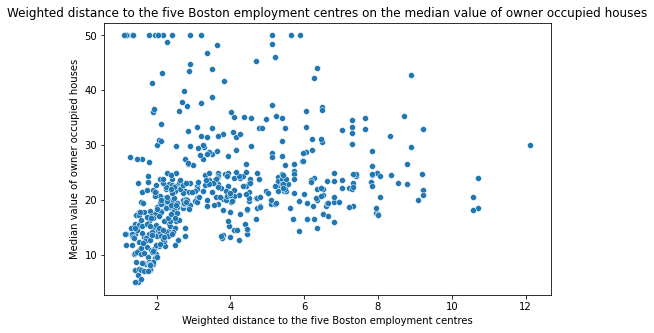

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title("Weighted distance to the five Boston employment centres on the median value of owner occupied houses") #title
plt.xlabel("Weighted distance to the five Boston employment centres") #x label
plt.ylabel("Median value of owner occupied houses") #y label
plt.show()

**Histogram for the Pupil to Teacher ratio:**

C:\Users\Pouya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


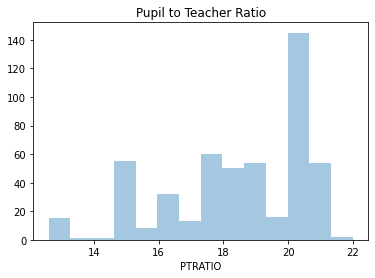

In [18]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False).set_title('Pupil to Teacher Ratio')

## Part 3: Statistical Analysis

### **Question 1**: Is there a significant difference in median value of houses bounded by the Charles river or not? 

Using T-test

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")


In [19]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

The P-value is less than 0.05, which means we can reject the null hypothesis that variancs are equal.

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Answer:** Since our P-value (i.e.7.390623170519905e-05) is less than the significance level, α (i.e. 0.05), we reject the null hypothesis. Therefore, there is enough evidence to support that the median values of houses bounded by the Charles river are different than the rest.

### **Question 2:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Using ANOVA

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is NO a difference in Median values of houses for each proportion of owner occupied units built prior to 1940")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940")


In [21]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] ==  'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 29.028583208977576, P-Value: 1.1723548056383608e-12


**Answer:** Since our P-value (i.e.1.1723548056383608e-12) is less than the significance level, α (i.e. 0.05), we reject the null hypothesis. Therefore, there is enough evidence to support that the median values of houses for each proportion of owner occupied units built prior to 1940 are different.

### **Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Using Pearson Correlation

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is NO correlation between Nitric oxide concentrations and proportion of non-retail business acres per town")
-   $H_1: µ_1 ≠ µ_2$ ("there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town")


In [22]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Answer:** Since our P-value (i.e.7.913361061239593e-98) is less than the significance level, α (i.e. 0.05), we reject the null hypothesis. Therefore, there is enough evidence to support that there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

### **Question 4:** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Using Regression with Correlation

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is NO correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied houses")
-   $H_1: µ_1 ≠ µ_2$ ("there is a correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied houses")


In [23]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        14:11:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.24992873408590396, 1.2066117273368359e-08)

**Answer:** Since our P-value (i.e.1.21e-08) is less than the significance level, α (i.e. 0.05), there is evidence of correlation between weighted distance to the five Boston employment centres on the median value of owner occupied houses.

Coefficience shows us the positive correlation of 1.0916 between these two variables, which means the increasing the distance has positive impact on the median value of owner occupied houses.

## Part 4: Final Conclusion

The reason why the values of units increase with their distance from employment centers could be because of the pollution factor. According to correlation analysis between Nitric oxide concentrations and non-retail business acres, these locations are producing more pollution. 

In other words, people prefer to stay further away from the employment centers and live in pollution-free areas. As a result, due to high demand, the houses with more distance from polluted areas (i.e. employment centers) relatively higher values.

| Date (YYYY-MM-DD) | Version | Author          | 
| ----------------- | ------- | --------------- | 
| 2021-03-29        | 0.1     | Pouya Taheri    | 